In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Medical_insurance.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

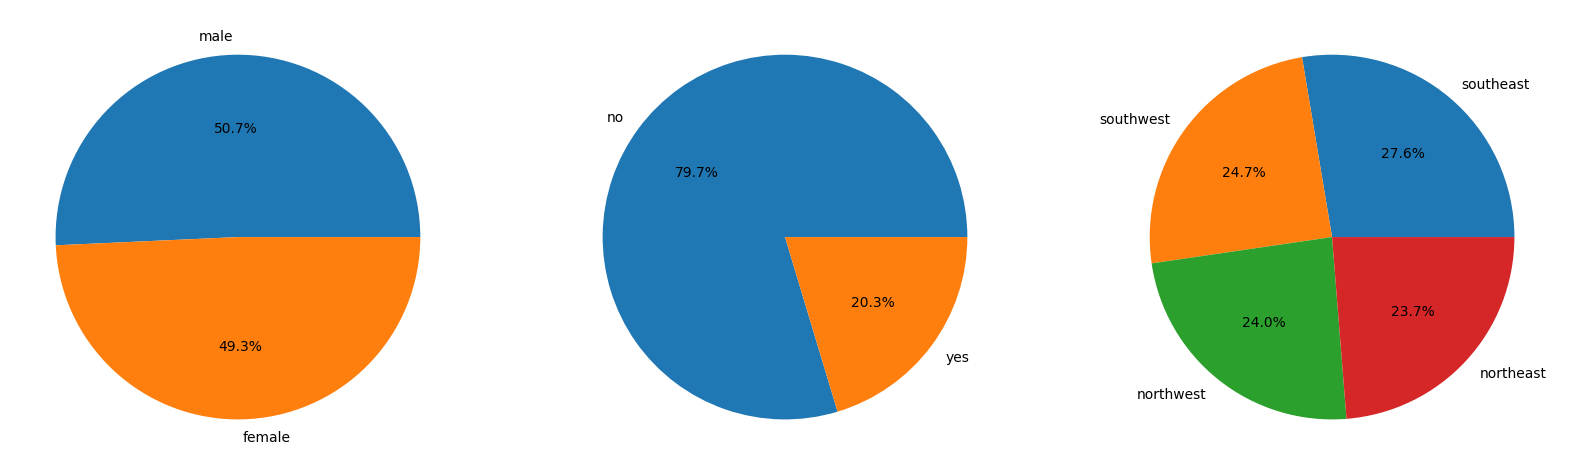

In [ ]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

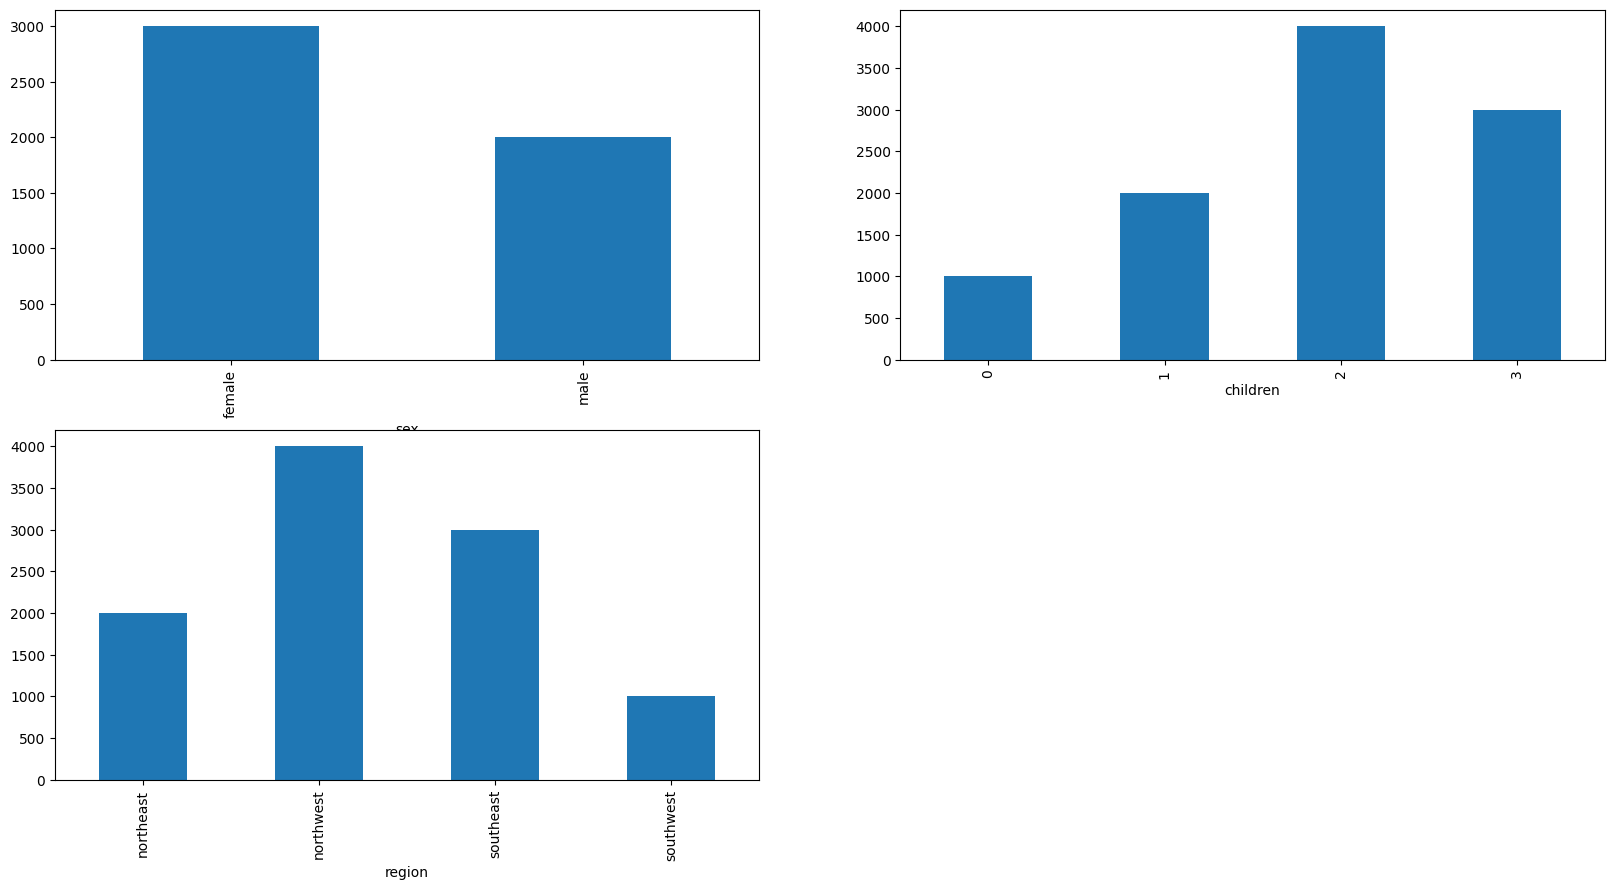

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a sample DataFrame
data = {
    'sex': ['male', 'female', 'male', 'female'],
    'children': [0, 1, 3, 2],
    'smoker': ['yes', 'no', 'no', 'yes'],
    'region': ['southwest', 'northeast', 'southeast', 'northwest'],
    'charges': [1000, 2000, 3000, 4000]
}

df = pd.DataFrame(data)

features = ['sex', 'children', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().plot.bar()
plt.show()





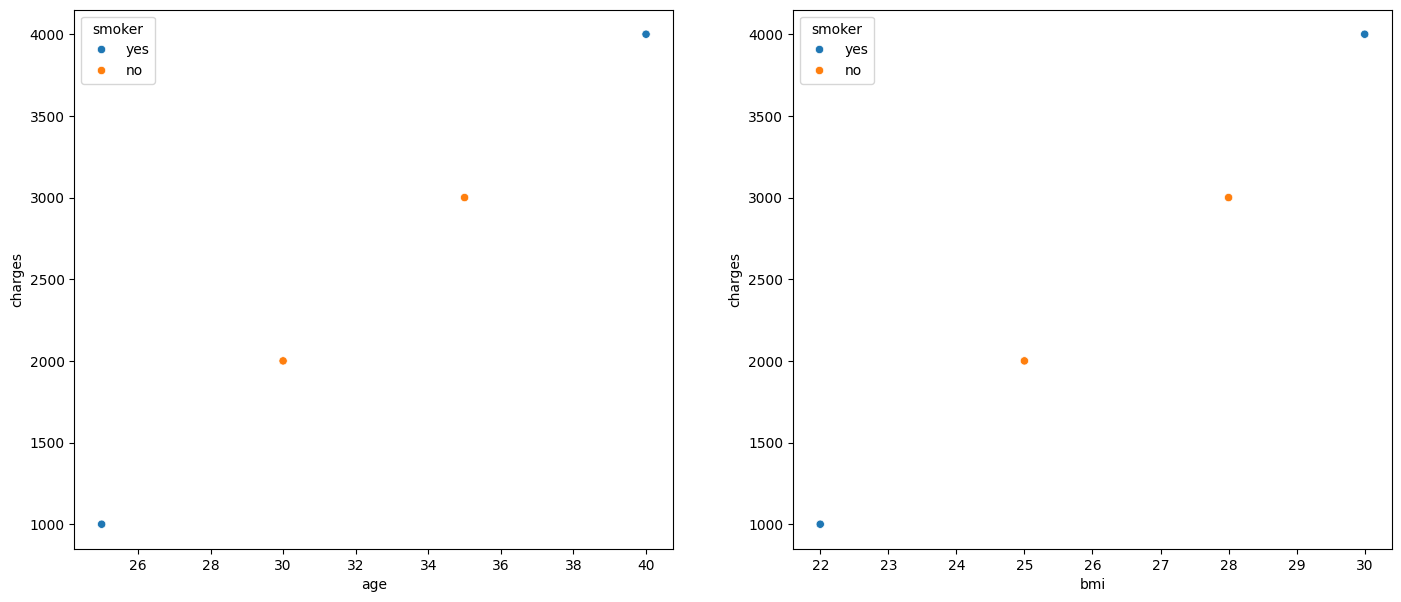

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Creating a sample DataFrame
data = {
    'age': [25, 30, 35, 40],
    'bmi': [22, 25, 28, 30],
    'charges': [1000, 2000, 3000, 4000],
    'smoker': ['yes', 'no', 'no', 'yes']
}

df = pd.DataFrame(data)

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.show()




<Axes: ylabel='age'>

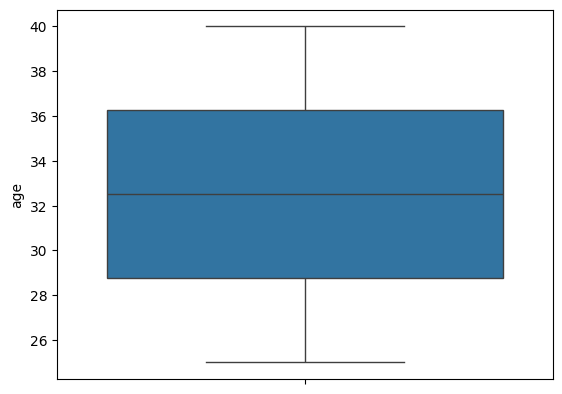

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


<Axes: ylabel='bmi'>

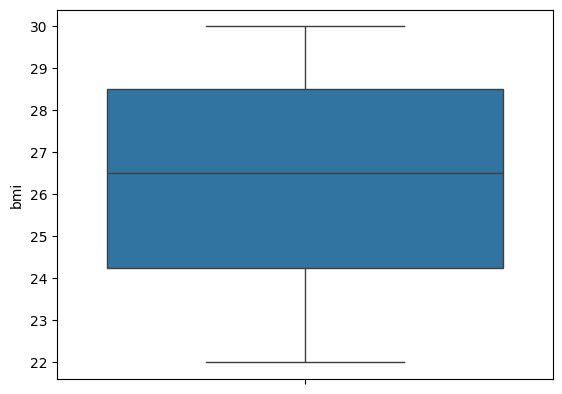

In [ ]:
sns.boxplot(df['bmi'])


In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


17.875
34.875


In [ ]:
!pip install feature-engine



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


<Axes: ylabel='bmi'>

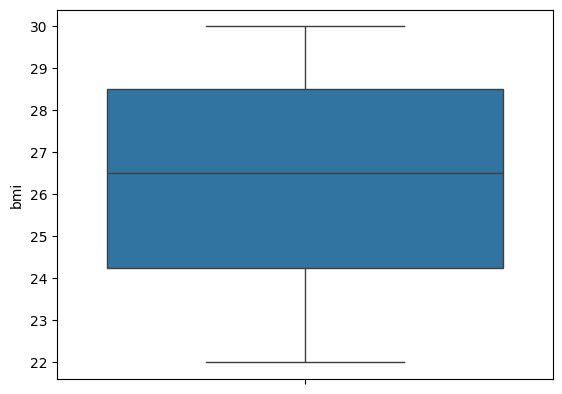

In [ ]:
import seaborn as sns
from feature_engine.outliers import ArbitraryOutlierCapper

# Assuming df is your DataFrame
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi': 13.6749}, max_capping_dict={'bmi': 47.315})
df[['bmi']] = arb.fit_transform(df[['bmi']])

sns.boxplot(df['bmi'])


In [ ]:
df['bmi'].skew()
df['age'].skew()


0.0

In [ ]:
# Check DataFrame structure
print(df.info())

# Check column names
print(df.columns)

# Apply mappings only if the columns exist
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})

if 'smoker' in df.columns:
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

if 'region' in df.columns:
    df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      4 non-null      int64 
 1   bmi      4 non-null      int64 
 2   charges  4 non-null      int64 
 3   smoker   4 non-null      object
dtypes: int64(3), object(1)
memory usage: 256.0+ bytes
None
Index(['age', 'bmi', 'charges', 'smoker'], dtype='object')


In [ ]:
df.corr()


,age,bmi,charges,smoker
age,1.00000,0.995910,1.00000,0.000000
bmi,0.99591,1.000000,0.99591,-0.082479
charges,1.00000,0.995910,1.00000,0.000000
smoker,0.00000,-0.082479,0.00000,1.000000


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming df is your DataFrame
X = df.drop(['charges'], axis=1)
Y = df['charges']  # No need for double brackets here

l1 = []  # List to store training accuracy
l2 = []  # List to store testing accuracy
l3 = []  # List to store cross-validation scores

# Loop over different random states
for i in range(40, 50):
    # Split data into train and test sets
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=i)

    # Initialize and fit the linear regression model
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)

    # Calculate and store training accuracy
    l1.append(lrmodel.score(xtrain, ytrain))

    # Calculate and store testing accuracy
    l2.append(lrmodel.score(xtest, ytest))

    # Calculate cross-validation score and store the mean
    cvs = cross_val_score(lrmodel, X, Y, cv=4).mean()  # Use 4-fold cross-validation
    l3.append(cvs)

# Create DataFrame to display results
df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3})
print(df1)







   train acc  test acc  cvs
0        1.0       NaN  NaN
1        1.0       NaN  NaN
2        1.0       NaN  NaN
3        1.0       NaN  NaN
4        1.0       NaN  NaN
5        1.0       NaN  NaN
6        1.0       NaN  NaN
7        1.0       NaN  NaN
8        1.0       NaN  NaN
9        1.0       NaN  NaN


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming df is your DataFrame
X = df.drop(['charges'], axis=1)
Y = df['charges']  # No need for double brackets here

# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)

# Print training and testing accuracies
print("Training Accuracy:", lrmodel.score(xtrain, ytrain))
print("Testing Accuracy:", lrmodel.score(xtest, ytest))

# Perform 4-fold cross-validation and print the mean score
cv_score = cross_val_score(lrmodel, X, Y, cv=4).mean()
print("Cross-Validation Score:", cv_score)


Training Accuracy: 1.0
Testing Accuracy: nan
Cross-Validation Score: nan
